#This python file do the training with Doc2vec

In [0]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import download 
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import multiprocessing
from nltk.tokenize import RegexpTokenizer
import warnings

In [0]:
def getDataset():
    Data = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
    Data_df= pd.DataFrame({'data':Data.data , 'label' : Data.target }) 
    return Data_df,Data

In [268]:
download('punkt') #tokenizer, run once
download('stopwords') #stopwords dictionary, run once
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
new_data=[]
def preprocess(text):
    for news in text:
        token = tokenizer.tokenize(news)
        token = [word.lower() for word in token if word not in stop_words]
        new_data.append(token)
    return new_data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
Data,Data2 = getDataset()
corpus = preprocess(Data['data'])

In [270]:
corpus[0]

['i',
 'wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'i',
 'saw',
 'day',
 'it',
 '2',
 'door',
 'sports',
 'car',
 'looked',
 'late',
 '60s',
 'early',
 '70s',
 'it',
 'called',
 'bricklin',
 'the',
 'doors',
 'really',
 'small',
 'in',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'this',
 'i',
 'know',
 'if',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'e',
 'mail']

In [0]:
cores = multiprocessing.cpu_count()
model_vec = Word2Vec(corpus,min_count =10,size=100,workers=cores,window=5,iter=30,sg=0)

In [272]:
print(model_vec)

Word2Vec(vocab=14040, size=100, alpha=0.025)


***Find the most similar words in the corpus to the word “car” along with their similarities.***


In [284]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
RuntimeWarning
model_vec.most_similar("car")

[('cars', 0.619587779045105),
 ('bike', 0.5843697786331177),
 ('bikes', 0.5833765268325806),
 ('toyota', 0.568603515625),
 ('mechanic', 0.5651537775993347),
 ('tires', 0.5618065595626831),
 ('owner', 0.556006908416748),
 ('engine', 0.5437662601470947),
 ('porsche', 0.5421695709228516),
 ('volvo', 0.5365939140319824)]

***Find the top 5 words similar to the 
following operations:***

 girl + father - boy
 
 sports - bat + ball


In [256]:
model_vec.most_similar_cosmul(positive=['girl','father'],negative=['boy'],topn=5)

[('sons', 1.039534330368042),
 ('son', 0.9789587259292603),
 ('egypt', 0.9723554253578186),
 ('buried', 0.9454286694526672),
 ('brothers', 0.9423195123672485)]

In [257]:
model_vec.most_similar_cosmul(positive=['sports','ball'],negative=['bat'],topn=5)

[('champion', 1.1305850744247437),
 ('television', 0.9805469512939453),
 ('correspondent', 0.951806902885437),
 ('district', 0.94666987657547),
 ('newspaper', 0.9447471499443054)]

***Create a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’, ‘police’, ‘government’, ‘circuit’, ‘car’]***


In [0]:
keys=['baseball','software','police','government','circuit','car']

embedding_clusters=[]
word_clusters=[]

for word in keys:
  embedding=[]
  words=[]
  
  for similar_word,_ in model_vec.most_similar(word,topn=20):
    words.append(similar_word)
    embedding.append(model_vec[similar_word])
  embedding_clusters.append(embedding)
  word_clusters.append(words)

In [0]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=50000, random_state=42)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

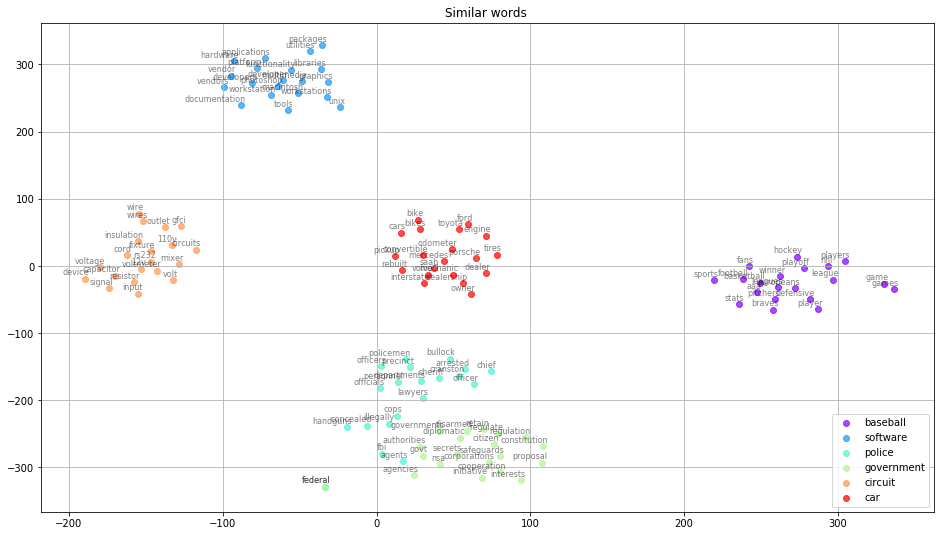

In [260]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()
tsne_plot_similar_words('Similar words ', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

 **Methodology to convert Word2vec to Doc2vec:**
    take the weighted average of the vectors for all words in the document (weighted by the TF-IDF score of the word) or concatenating the weighted word vectors for the words in the vocabulary

In [0]:
model_vec.train(corpus,epochs=150,total_examples = len(corpus))

(138568992, 157827000)

In [0]:
words = list(model_vec.wv.vocab)

In [0]:
tot_size = Data2.target

In [275]:
len(tot_size)

11314

In [0]:
vec = model_vec.wv

In [280]:
vec['car']

array([-0.02563603,  1.1957545 ,  1.25409   ,  2.0509045 ,  1.8533068 ,
        0.27354223,  0.16592659, -3.6133206 , -1.3800778 ,  2.0576031 ,
       -0.54031676,  3.4041965 ,  0.9550617 ,  1.3295252 ,  1.9246486 ,
       -2.1213014 , -1.1554374 ,  1.6358551 ,  0.28476816,  0.4263713 ,
       -0.5593435 , -1.85032   , -0.14196637,  2.3076286 ,  0.21115386,
       -2.189755  ,  1.6211672 ,  0.28620642,  0.07412004,  3.7048979 ,
       -1.897215  , -2.1563942 , -2.9560702 , -0.23067635,  0.2828428 ,
       -1.6067996 ,  2.533739  , -0.23709652,  1.7252425 ,  1.325909  ,
       -1.5152999 ,  1.0386374 , -0.35576114,  1.4399438 ,  2.77128   ,
        0.66443896,  0.17600301, -1.2468033 , -1.0364954 ,  0.1752041 ,
       -0.09879603,  1.6461967 , -3.4178417 ,  2.1939805 , -0.84220594,
        2.9518178 ,  0.19554333, -1.2140749 , -0.72799873, -0.38353512,
        0.69974697, -2.456244  , -0.07827902,  0.9308885 ,  1.4593259 ,
       -4.0311246 ,  0.32206523,  2.7038124 , -1.4150367 , -0.13

In [281]:
model_vec['car']

array([-0.02563603,  1.1957545 ,  1.25409   ,  2.0509045 ,  1.8533068 ,
        0.27354223,  0.16592659, -3.6133206 , -1.3800778 ,  2.0576031 ,
       -0.54031676,  3.4041965 ,  0.9550617 ,  1.3295252 ,  1.9246486 ,
       -2.1213014 , -1.1554374 ,  1.6358551 ,  0.28476816,  0.4263713 ,
       -0.5593435 , -1.85032   , -0.14196637,  2.3076286 ,  0.21115386,
       -2.189755  ,  1.6211672 ,  0.28620642,  0.07412004,  3.7048979 ,
       -1.897215  , -2.1563942 , -2.9560702 , -0.23067635,  0.2828428 ,
       -1.6067996 ,  2.533739  , -0.23709652,  1.7252425 ,  1.325909  ,
       -1.5152999 ,  1.0386374 , -0.35576114,  1.4399438 ,  2.77128   ,
        0.66443896,  0.17600301, -1.2468033 , -1.0364954 ,  0.1752041 ,
       -0.09879603,  1.6461967 , -3.4178417 ,  2.1939805 , -0.84220594,
        2.9518178 ,  0.19554333, -1.2140749 , -0.72799873, -0.38353512,
        0.69974697, -2.456244  , -0.07827902,  0.9308885 ,  1.4593259 ,
       -4.0311246 ,  0.32206523,  2.7038124 , -1.4150367 , -0.13

In [0]:
import numpy as np
docu_vector = np.zeros((len(tot_size),100))
for i in range(len(tot_size)):
    vector = []
    doc_no = tot_size[i]
    for words in corpus[doc_no]:
            if words in model_vec.wv.vocab:
                vector.append(model_vec[words])
    vec_arr = np.asarray(vector)
    docu_vector[i] = np.mean(vec_arr , axis = 0)

In [312]:
train_size = int(len(docu_vector) * .8)
test_size = len(docu_vector) - train_size
x_train = np.zeros((train_size , 100))
x_test = np.zeros((test_size , 100))
for i in range(train_size):
    x_train[i] = docu_vector[i]
print(i)
j=0
while(j<test_size):
    #print(i+j)
    x_test[j] = docu_vector[i+j]
    j = j+1

9050


In [313]:
x_train

array([[-0.32231963,  0.19040506, -0.204826  , ..., -0.31891137,
         0.03896859, -0.42408022],
       [ 0.26220283, -0.52813876, -0.03361913, ...,  0.09364378,
        -0.04967861, -0.50261664],
       [ 0.26220283, -0.52813876, -0.03361913, ...,  0.09364378,
        -0.04967861, -0.50261664],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.08913459,  0.05410718, -0.27121904, ..., -0.17518879,
         0.04699292, -0.35673448],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [0]:
x_tr = np.nan_to_num(x_train)

In [326]:
x_tr

array([[-0.32231963,  0.19040506, -0.204826  , ..., -0.31891137,
         0.03896859, -0.42408022],
       [ 0.26220283, -0.52813876, -0.03361913, ...,  0.09364378,
        -0.04967861, -0.50261664],
       [ 0.26220283, -0.52813876, -0.03361913, ...,  0.09364378,
        -0.04967861, -0.50261664],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08913459,  0.05410718, -0.27121904, ..., -0.17518879,
         0.04699292, -0.35673448],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
y_train = np.zeros((11334))


In [0]:
y_train = Data2.target[:train_size]

In [0]:
y_train

array([ 7.,  4.,  4., ..., 11., 19.,  4.])

In [320]:
y_train.shape

(9051,)

In [317]:
x_tr.shape

(9051, 100)

In [0]:
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [321]:
model = Sequential()
model.add(Dense(512, input_shape=(100,)))
model.add(Activation('tanh'))
#model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Activation('tanh'))
#model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 512)               51712     
_________________________________________________________________
activation_63 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_64 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 20)                5140      
_________________________________________________________________
activation_65 (Activation)   (None, 20)                0         
Total params: 188,180
Trainable params: 188,180
Non-trainable params: 0
_______________________________________________

In [333]:
history = model.fit(x_tr, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_split=(1.0/8))

Train on 7919 samples, validate on 1132 samples
Epoch 1/10
7919/7919 [==============================] - 3s 334us/step - loss: 1.9160e-06 - acc: 1.0000 - val_loss: 1.9171e-06 - val_acc: 1.0000
Epoch 2/10
7919/7919 [==============================] - 3s 327us/step - loss: 1.9160e-06 - acc: 1.0000 - val_loss: 1.9171e-06 - val_acc: 1.0000
Epoch 3/10
7919/7919 [==============================] - 3s 332us/step - loss: 1.9160e-06 - acc: 1.0000 - val_loss: 1.9171e-06 - val_acc: 1.0000
Epoch 4/10
7919/7919 [==============================] - 3s 330us/step - loss: 1.9160e-06 - acc: 1.0000 - val_loss: 1.9171e-06 - val_acc: 1.0000
Epoch 5/10
7919/7919 [==============================] - 3s 330us/step - loss: 1.9160e-06 - acc: 1.0000 - val_loss: 1.9171e-06 - val_acc: 1.0000
Epoch 6/10
7919/7919 [==============================] - 3s 344us/step - loss: 1.9160e-06 - acc: 1.0000 - val_loss: 1.9171e-06 - val_acc: 1.0000
Epoch 7/10
7919/7919 [==============================] - 3s 345us/step - loss: 1.9160e-06